In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import mlc_func as mlcf
import numpy as np
import pandas as pd
import mlc_func_old as mlc_func
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [8]:
def create_target_file(baseline, reference, output, offset = 0):
    targets = np.genfromtxt(reference, delimiter = ',') -\
        np.genfromtxt(baseline, delimiter = ',') - offset
    pd.DataFrame(targets).to_csv(output, index = None, header = None)

In [39]:
mono_offset

469.79874832702154

In [57]:
basepath_feat = '../publication/data/BH/qz_custom/'
basepath_tar =  '../publication/data/BH/qz_custom/'
basepath_ref = '../publication/data/MB-pol/'
systems = ['trimers','dimers','monomers','16']
# systems = ['trimers','dimers','monomers']
# mono_offset = 469.79981032859143
mono_offset = (np.genfromtxt('../publication/data/MB-pol/monomers.energies') -\
                 np.genfromtxt('../publication/data/BH/qz_custom/monomers.energies'))[0]
n_mol = [3,2,1,16]
for s,nm in zip(systems, n_mol):
    create_target_file(basepath_tar +'/{}.energies'.format(s),
                      basepath_ref + '/{}.energies'.format(s),
                      basepath_tar +'/{}.energy_targets'.format(s), mono_offset*nm)
        
feature_src = [basepath_feat + s +'_processed.hdf5' for s in systems]
target_src = [basepath_tar +'/' + s +'.energy_targets' for s in systems]
filters = [np.genfromtxt('../publication/data/filters/{}.filter'.format(s), dtype =bool) for s in systems[:-1]]
filters.append([True]*50)
nn = mlcf.ml.build_energy_mlcf(feature_src, target_src, automask_std = 1e-3, filters = filters,
                                          autofilt_percent=0.0001)


{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
scale_together


In [10]:
nn = mlcf.ml.load_network('../publication/models/bh_qz_to_mbp_select/')

scale_together
INFO:tensorflow:Restoring parameters from ../publication/models/bh_qz_to_mbp_select/model.ckpt


In [51]:
nn.restore_model('../publication/models/bh_qz_to_mbp_select/model')

INFO:tensorflow:Restoring parameters from ../publication/models/bh_qz_to_mbp_select/model.ckpt


In [58]:
nn.train(step_size=0.001, max_steps= 160001 ,b_=[1e-8, 1e-8], multiplier=[1,1,1,2])

multipliers: [1, 1, 1, 2]
Step: 0
Training set loss:
0: 8.901963233947754
1: 5.910632133483887
2: 2.950411319732666
3: 47.6384391784668
Total: 68.27684020996094
Validation set loss:
0: 8.904362678527832
1: 5.9126081466674805
2: 2.9528071880340576
3: 47.60236358642578
Total: 68.22708892822266
--------------------
L2-loss: 6.757678420399316e-06
Step: 16000
Training set loss:
0: 0.024919282644987106
1: 0.02280554734170437
2: 0.008522141724824905
3: 0.005517809651792049
Total: 0.03570130094885826
Validation set loss:
0: 0.025460809469223022
1: 0.021276049315929413
2: 0.010375205427408218
3: 0.0683465301990509
Total: 0.10271837562322617
--------------------
L2-loss: 7.5470711635716725e-06
Step: 32000
Training set loss:
0: 0.0196305550634861
1: 0.017679322510957718
2: 0.005990350153297186
3: 0.003025539917871356
Total: 0.027424609288573265
Validation set loss:
0: 0.02064758539199829
1: 0.017843972891569138
2: 0.006701950449496508
3: 0.06707176566123962
Total: 0.09892871230840683
------------

KeyboardInterrupt: 

0.0018535333430753844
-0.0002999983869003131


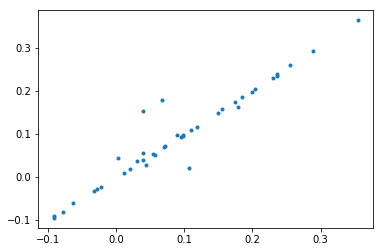

In [59]:
plot(nn.get_logits(which='train')[3], nn.subnets[3][0].y_train, ls = '', marker = '.')
print(np.std(nn.get_logits(which='train')[3] -  nn.subnets[3][0].y_train)/16)
print(np.mean(nn.get_logits(which='train')[3] -  nn.subnets[3][0].y_train)/16)

===========trimers===========
RMSE: 2.72 (27.65)
MAX: 13.58 (78.68)
MAE: 2.11 (21.86)
===========dimers===========
RMSE: 4.53 (39.40)
MAX: 36.09 (154.82)
MAE: 3.35 (30.94)
===========monomers===========
RMSE: 2.42 (58.40)
MAX: 19.38 (167.36)
MAE: 1.66 (46.86)


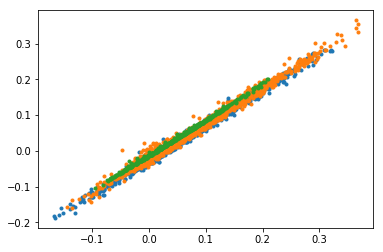

In [42]:
n_mol_dict = {'monomers' : 1, 'dimers': 2,'trimers': 3}
for i in range(3):
    plot(nn.get_logits(which='train')[i], nn.subnets[i][0].y_train, ls = '', marker = '.')
    dev = (nn.get_logits(which='train')[i] - nn.subnets[i][0].y_train)/n_mol_dict[systems[i]]*1000
    dev_bh = nn.subnets[i][0].y_train/n_mol_dict[systems[i]]*1000
    dev -= np.mean(dev)
    dev_bh -= np.mean(dev_bh)
    print('==========={}==========='.format(systems[i]))
    print('RMSE: {:3.2f} ({:3.2f})'.format(np.std(dev),np.std(dev_bh)))
    print('MAX: {:3.2f} ({:3.2f})'.format(np.max(np.abs(dev)),np.max(np.abs(dev_bh))))
    print('MAE: {:3.2f} ({:3.2f})'.format(np.mean(np.abs(dev)),np.mean(np.abs(dev_bh))))

===========trimers===========
RMSE: 2.89 (28.25)
MAX: 12.27 (75.20)
MAE: 2.16 (22.29)
===========dimers===========
RMSE: 4.33 (40.17)
MAX: 31.03 (136.91)
MAE: 2.91 (31.28)
===========monomers===========
RMSE: 2.29 (53.19)
MAX: 14.71 (151.19)
MAE: 1.25 (43.13)


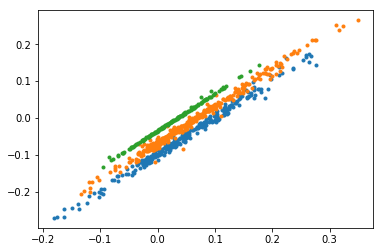

In [11]:
n_mol_dict = {'monomers' : 1, 'dimers': 2,'trimers': 3}
for i in range(3):
    plot(nn.get_logits(which='test')[i], nn.subnets[i][0].y_test, ls = '', marker = '.')
    dev = (nn.get_logits(which='test')[i] - nn.subnets[i][0].y_test)/n_mol_dict[systems[i]]*1000
    dev_bh = nn.subnets[i][0].y_test/n_mol_dict[systems[i]]*1000
    dev -= np.mean(dev)
    dev_bh -= np.mean(dev_bh)
    print('==========={}==========='.format(systems[i]))
    print('RMSE: {:3.2f} ({:3.2f})'.format(np.std(dev),np.std(dev_bh)))
    print('MAX: {:3.2f} ({:3.2f})'.format(np.max(np.abs(dev)),np.max(np.abs(dev_bh))))
    print('MAE: {:3.2f} ({:3.2f})'.format(np.mean(np.abs(dev)),np.mean(np.abs(dev_bh))))

In [9]:
nn.save_all('../publication/models/bh_qz_to_mbp_select/', override=True)

Overriding...


In [8]:
import pickle

In [9]:
pickle.dump(masks, open('../publication/models/bh_qz_to_mbp_select/masks', 'wb'))